In [1]:
import torch

from IPython.display import Image, clear_output  # to display images
# from utils.downloads import attempt_download  # to download models/datasets

In [3]:
# !pip install -qr requirements.txt
from roboflow import Roboflow

In [5]:
from roboflow import Roboflow
rf = Roboflow(api_key="3ar2TsaBp57akjzh4Uo5")
project = rf.workspace("hkupyloo").project("contemporary-projects-v2")
dataset = project.version(7).download("yolov5")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Contemporary-Projects-V2-7 in yolov5pytorch:: 100%|██████████| 910/910 [00:00<00:00, 3213.23it/s]


In [6]:
%cat {dataset.location}/data.yaml

names:
- person
nc: 1
roboflow:
  license: CC BY 4.0
  project: contemporary-projects-v2
  url: https://universe.roboflow.com/hkupyloo/contemporary-projects-v2/dataset/7
  version: 7
  workspace: hkupyloo
test: ../test/images
train: Contemporary-Projects-V2-7/train/images
val: Contemporary-Projects-V2-7/valid/images


In [7]:
import yaml
with open(dataset.location + "/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [8]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [10]:
%%writetemplate /home/yuanzf/yolov5/models/historical_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

FileNotFoundError: [Errno 2] No such file or directory: '/home/yuanzf/yolov5/models/historical_yolov5s.yaml'

In [17]:
!python /media/data_16T/chloe/WilliamWhyteOctober/uvi-yolov5-deepsort/yolov5/train.py --img 640  --batch 16 --epochs 300 --data /media/data_16T/chloe/WilliamWhyteOctober/roboflow/Contemporary-Projects-V2-7/data.yaml --weights /media/data_16T/chloe/WilliamWhyteOctober/uvi-yolov5-deepsort/yolov5/weights/oct31300epochsyolov5m.pt --name yolov5moctober300epochs  --cache

train: weights=yolov5s.pt, cfg=, data=/media/data_16T/chloe/WilliamWhyteOctober/roboflow/Contemporary-Projects-V2-7/data.yaml, hyp=../uvi-yolov5-deepsort/yolov5/data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=../uvi-yolov5-deepsort/yolov5/runs/train, name=october300epochs, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-231-gc2f131a Python-3.8.18 torch-2.1.0 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05

In [36]:
# !python train.py --img 640  --batch 16 --epochs 100 --data {dataset.location}/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '' --name yolov5s_results  --cache

In [ ]:
# python train.py --img 640  --batch 16 --epochs 100 --data /home/yuanzf/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '' --name yolov5s_results  --cache

GROUND TRUTH TRAINING DATA:


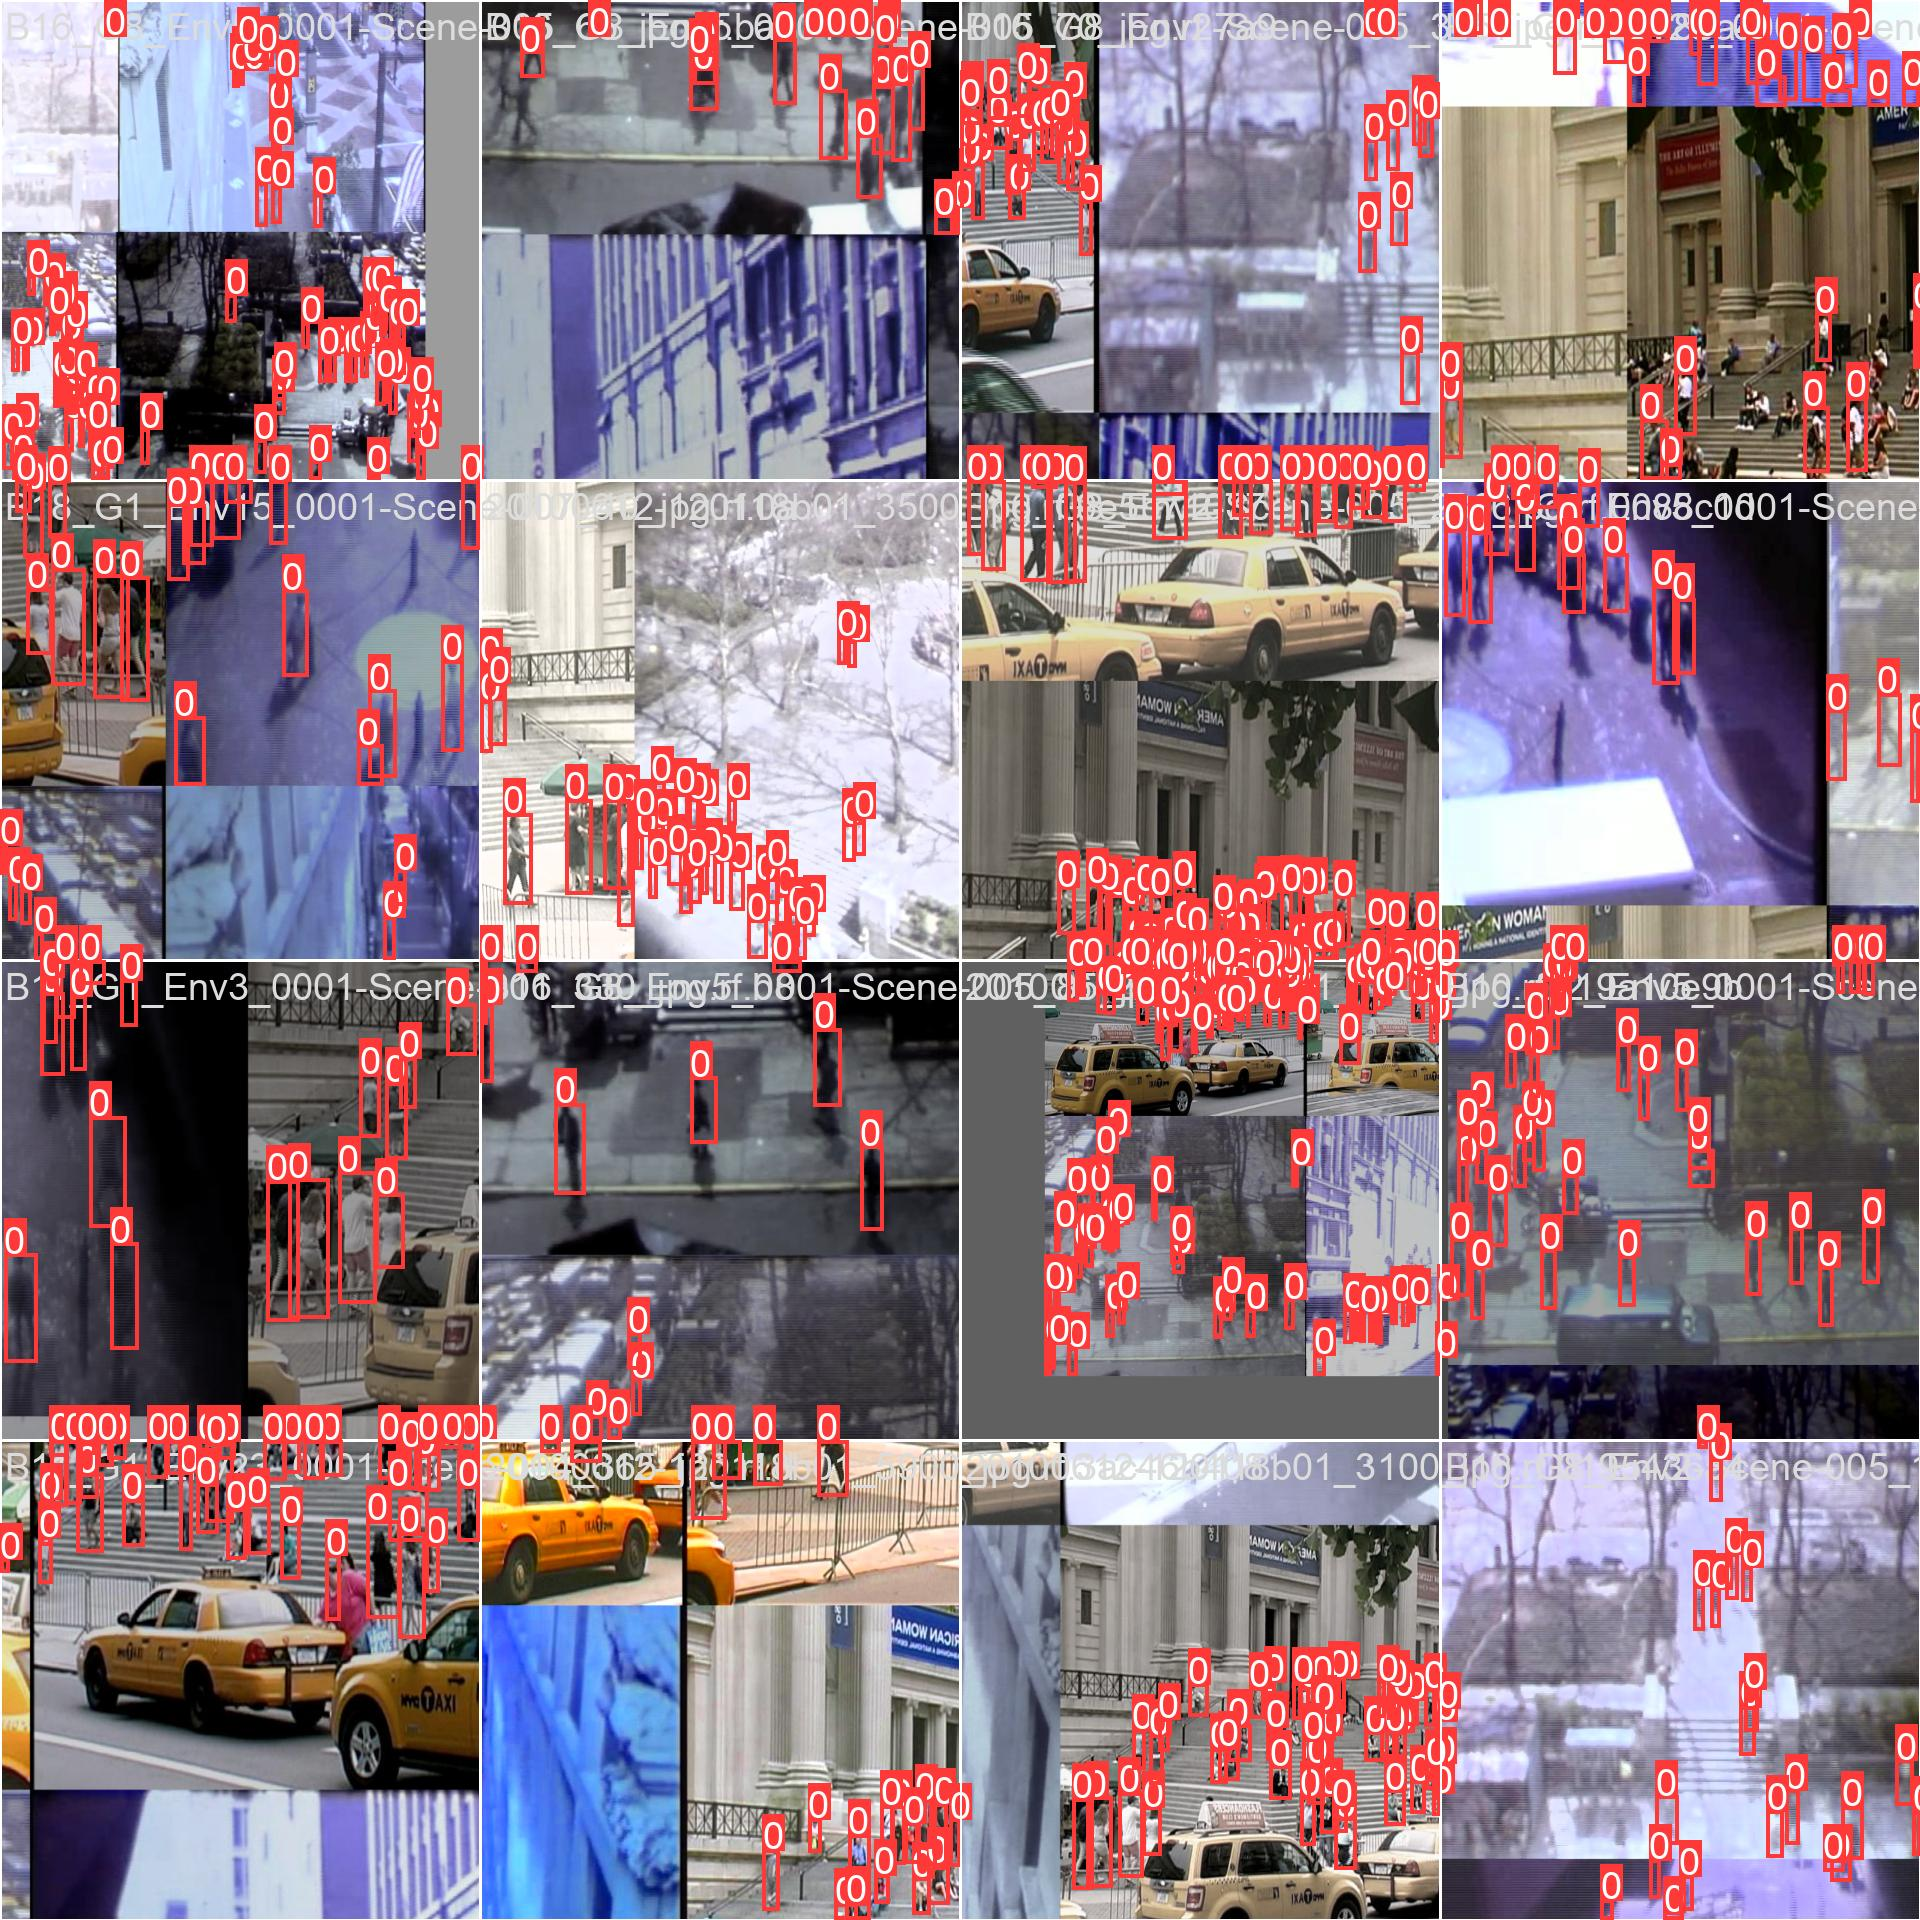

In [10]:
print("GROUND TRUTH TRAINING DATA:")
Image(filename='./runs/train/yolov5_diverse/train_batch2.jpg', width=900)

In [11]:
%ls runs/train/yolov5_diverse/weights

best.pt  last.pt


In [19]:
!python detect.py --weights runs/train/yolov5_diverse/weights/best.pt --conf 0.5 --source ./historical-video-pedestrian-detection-5/test/images

detect: weights=['runs/train/yolov5_diverse/weights/best.pt'], source=./historical-video-pedestrian-detection-5/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.11.3 torch-2.0.1+cu117 CUDA:0 (Quadro RTX 6000, 24212MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/25 /home/yuanzf/yolov5/historical-video-pedestrian-detection-5/test/images/20100612-120118b01_10000_jpg.rf.70e8697aacd65febd9bbe7e1169350d7.jpg: 640x640 67 persons, 4.8ms
image 2/25 /home/yuanzf/yolov5/historical-video-pedestrian-detection-5/test/images/20100612-120118b01_2200_jpg.rf.fe6

In [20]:
import glob
for imageName in glob.glob('./runs/detect/exp9/*.jpg')[:1]: #assuming JPG
    Image(filename=imageName)
    # print("\n")

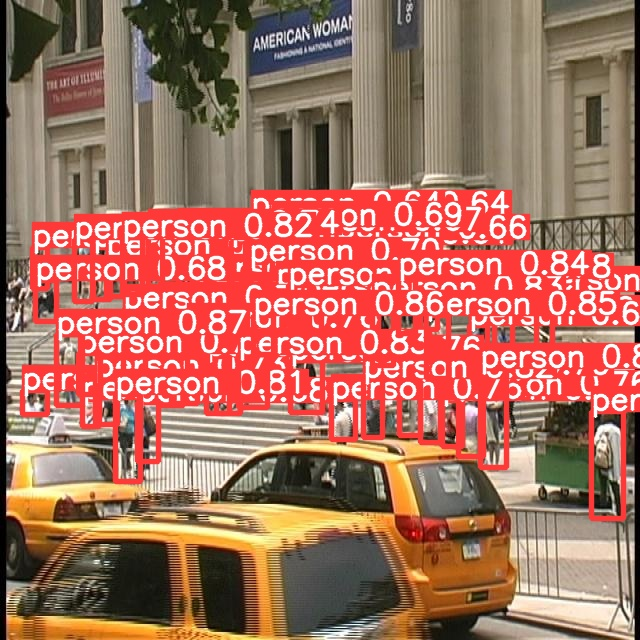

In [21]:
Image(filename=imageName)

## Export the weight and embed to deepsort

In [22]:
!cp /home/yuanzf/yolov5/runs/train/yolov5_diverse/weights/best.pt /home/yuanzf/DeepSORT_YOLOv5_Pytorch/yolov5/weights/yolov5_diverse.pt